In [8]:
import cv2
import easygui
import numpy as np
import imageio
import sys
import matplotlib.pyplot as plt
import os
import uuid
import time
import tkinter as tk
from tkinter import filedialog
from tkinter import *
import tkinter.messagebox
from PIL import ImageTk, Image

In [9]:
top=tk.Tk()
top.geometry('500x500')
top.title('Image Cartoonifier!')
top.configure(background='yellow')
label=Label(top,background='#CDCDCD', font=('times new roman',20,'bold'))

In [10]:
ImagePath = '.\images'

In [11]:
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

In [12]:
def new_image():
    cap = cv2.VideoCapture(0)
    time.sleep(5)
    for imgnum in range(1): 
        ret, frame = cap.read()
        newName="Live"
        path1 = os.path.dirname(ImagePath)
        extension=os.path.splitext(ImagePath)[1]
        path = os.path.join(path1, newName+extension)
        cv2.imwrite(newName+extension, frame)
        cv2.imshow('frame', frame)
        time.sleep(2)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()

In [13]:
def cartoonify(ImagePath):
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
    ReSized1 = cv2.resize(originalmage, (960, 540))
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 9, 9)
    ReSized4 = cv2.resize(getEdge, (960, 540))
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, 
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='red',font=('times new roman',10,'bold'))
    save1.pack(side=TOP,pady=50)
    plt.show()

In [14]:
def save(ReSized6, ImagePath):
    newName="NewImage"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

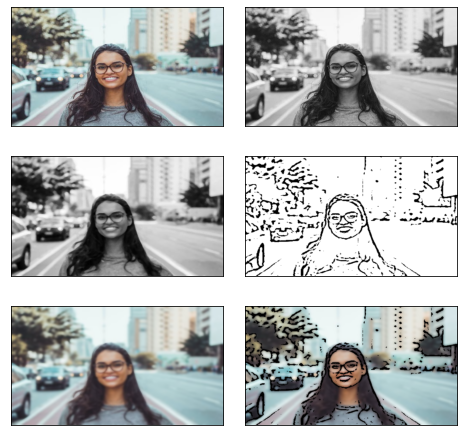

In [ ]:
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='red',font=('times new roman',10,'bold'))
upload.pack(side=TOP,pady=50)
#new_image=Button(top,text="Cartoonify a Live Image",command=new_image,padx=10,pady=5)
#new_image.configure(background='#364156', foreground='red',font=('times new roman',10,'bold'))
#new_image.pack(side=TOP,pady=50)
top.mainloop()